In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import configs
import h5py
import os
from src.envs.darkroom import DarkroomEnv


# Load Model

In [2]:
corr = 0.25
model_name, path_to_pkl, eval_dset_path = configs.get_model_paths(corr, "darkroom_simple")

epoch=13-val_loss=0.911523.ckpt


# Load Dataset and Create Environment

In [3]:
is_h5_file = eval_dset_path.endswith('.h5')
if is_h5_file:
    eval_trajs = h5py.File(eval_dset_path, 'r')
    traj_indices = list(eval_trajs.keys())
else:  # Pickle file
    with open(eval_dset_path, 'rb') as f:
        eval_trajs = pickle.load(f)
n_eval_envs = len(eval_trajs)

# Estimate the maximum accuracy possible 
100% is not possible because sometimes you query before any reward information is given (e.g., see eval_idxs). Also, there are multiple paths to reward in gridworld. Tiebreaking from the oracle is random, but that doesn't mean the model is behaving incorrectly if it predicts an alternate action.  

In [6]:
query_every = 10
max_acc = []
for eval_traj in eval_trajs:
    seq_length = eval_traj['context_states'].shape[0]
    eval_idxs = np.concatenate([np.arange(0, seq_length, query_every), [seq_length-1]])
    opt_accuracy = np.ones(len(eval_idxs))*0.25
    first_reward = np.argwhere(eval_traj['context_rewards']>0)
    if first_reward.size > 0:
        first_reward = first_reward[0, 0]
        opt_accuracy[eval_idxs>first_reward] = 1
    max_acc.append(opt_accuracy.mean())

In [7]:
np.mean(max_acc)

np.float64(0.8177405753968253)

# Show and save examples of the state encoding

In [3]:
env = DarkroomEnv(maze_dim=6, horizon=200, state_dim=10, node_encoding_corr=0.25, initialization_seed=0)

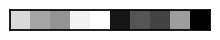

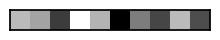

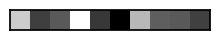

In [4]:
save_dir = 'figs/sample_state_encodings/'
os.makedirs(save_dir, exist_ok=True)
for x in range(env.maze_dim):
    for y in range(env.maze_dim):
        node_encoding = np.array(env.node_map_pos_to_encoding[(x, y)])
        plt.figure(figsize=(5, 0.5))
        plt.imshow(node_encoding.reshape(1, -1), cmap='gray')
        plt.xticks([])
        plt.yticks([])
        plt.tight_layout()
        plt.savefig(f'{save_dir}/{x}_{y}.png', transparent=True, dpi=300)
        plt.savefig(f'{save_dir}/{x}_{y}.svg', transparent=True, dpi=300)
        if (x*env.maze_dim + y) < 3:
            plt.show()
        plt.close()


# Get distribution of when reward is first seen across the different trajectories

In [30]:
first_rewards = []
for eval_traj in eval_trajs:
    first_reward = np.argwhere(eval_traj['context_rewards']>0)
    if first_reward.size > 0:
        first_rewards.append(first_reward[0, 0])
    else:
        first_rewards.append(np.nan)


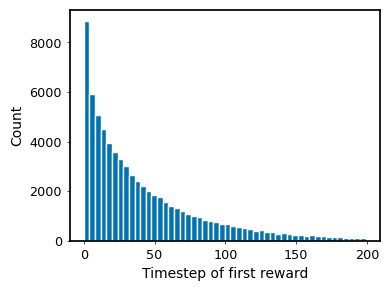

In [32]:
plt.figure(figsize=(4, 3))
plt.hist(first_rewards, bins=50)
plt.ylabel('Count')
plt.xlabel('Timestep of first reward')
plt.show()